In [167]:
from __future__ import print_function

In [251]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD> water.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   6319      0 --:--:-- --:--:-- --:--:--  6327


In [252]:
import os 
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/amk742/PUIDATA


In [253]:
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/amk742/PUIDATA


In [254]:
!mv water.csv $PUIDATA

In [255]:
!ls $PUIDATA

poplulation.csv  schoolroute.csv  trafficcounts.csv  water.csv


In [264]:
import pandas as pd
wc = pd.read_csv("%s/water.csv"%os.getenv("PUIDATA"))

In [265]:
wc.head (8)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182
7,1986,7319246.0,1351.0,185


In [260]:
wc.tail (3)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
36,2015,8516502.0,1009.0,118
37,2016,8537673.0,1002.0,117
38,2017,8622698.0,990.2,115


In [266]:
wc.columns 

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [267]:
wc.size

156

In [275]:
wc_2c = wc[['New York City Population','Per Capita(Gallons per person per day)']]

In [276]:
wc_2c.head()

,New York City Population,Per Capita(Gallons per person per day)
0,7102100.0,213
1,7071639.0,213
2,7089241.0,185
3,7109105.0,194
4,7181224.0,198


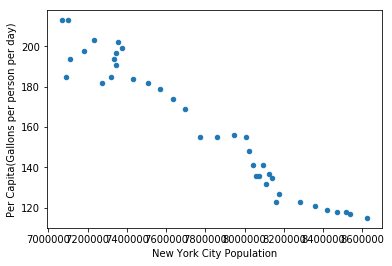

In [278]:
wc_2c.plot(x="New York City Population",y="Per Capita(Gallons per person per day)", kind='scatter')

### Figure 1. New York City Population and the level of Per Capita(Gallons per person per day

In [311]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [312]:
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [313]:
wc = pd.read_json(url)

In [314]:
wc.head(3)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981


In [317]:
wc_3c = wc[['year', 'nyc_consumption_million_gallons_per_day', 'per_capita_gallons_per_person_per_day']]

In [318]:
pop_3c.rename(columns = {'new_york_city_population':'New_York_City_Population', 
               'nyc_consumption_million_gallons_per_day':'NYC_Consumption_Million_Gallons_Per_Day', 
               'per_capita_gallons_per_person_per_day': 'Per_Capita_Gallons_Per_Person_Per_Day'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


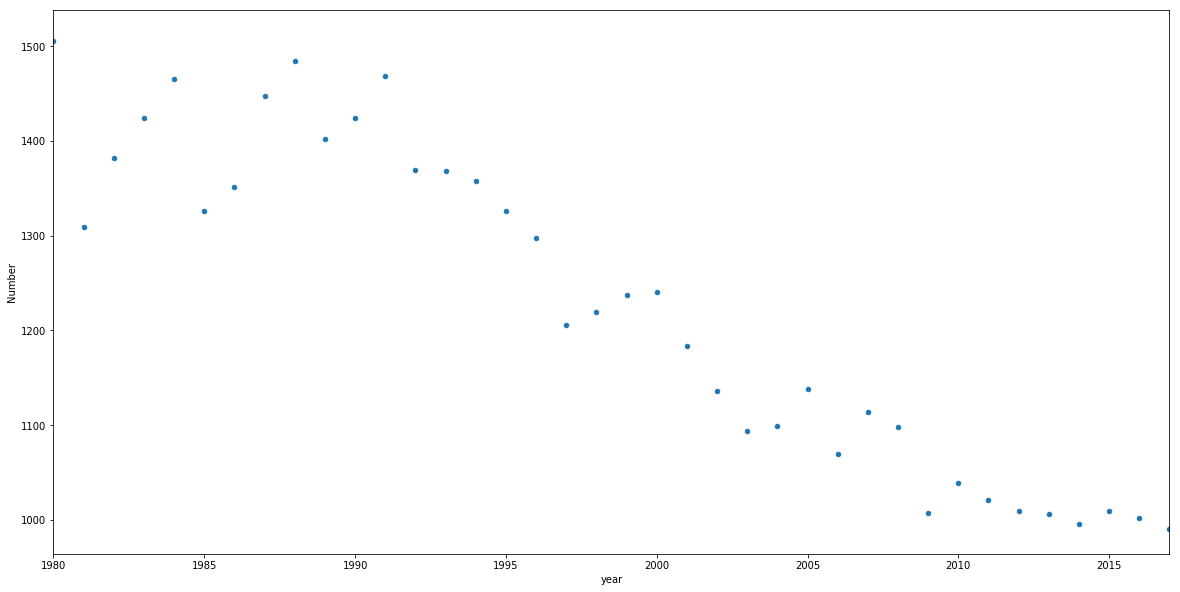

In [336]:
ax = wc_3c.plot(x='year', y='nyc_consumption_million_gallons_per_day', kind='scatter', figsize=(20,10));
plt.xlim(1980,2017)
ax.set_ylabel("Number");

### Figure 2. indicates the New York City Consumption of million gallons per day 

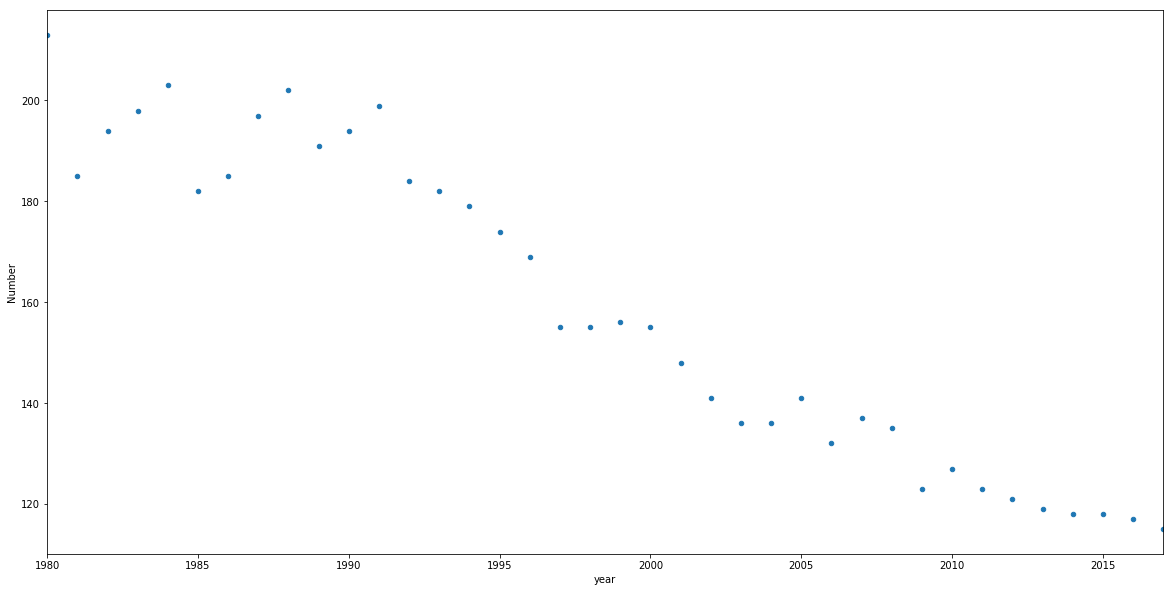

In [342]:
ax = wc_3c.plot(x='year', y='per_capita_gallons_per_person_per_day', kind='scatter', figsize=(20,10));
plt.xlim(1980,2017)
ax.set_ylabel("Number");

### Figure 3. indicates the New York City Per capita Gallons Per Person Per Day